In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sea
from scipy.stats import norm, ks_2samp
from etc import *

''

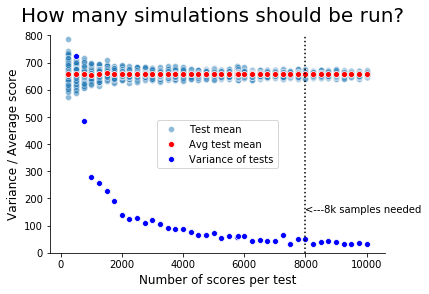

In [194]:
df = pd.read_csv('../data/batchtests.csv')
mean = df.groupby('batch_size').mean()
std = df.groupby('batch_size').var()
fig, ax = plt.subplots()
ax = sea.scatterplot(
    df['batch_size'], 
    df['mean'], 
    alpha=.5,
    label='Test mean')
ax = sea.scatterplot(mean['mean'].index,mean['mean'],color = 'r',label='Avg test mean')
ax = sea.scatterplot(std['mean'].index,std['mean'],color='b',label='Variance of tests')
plt.ylim(bottom=0, top=800);
plt.legend()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylabel('Variance / Average score', fontsize=12)
ax.set_xlabel('Number of scores per test', fontsize=12)
fig.suptitle('How many simulations should be run?', fontsize=20)
ax.axvline(8000, color='k', linestyle=':')
ax.text(8000,150, '<---8k samples needed')
plt.savefig('../images/sim_size_test.png', format='png')
;

''

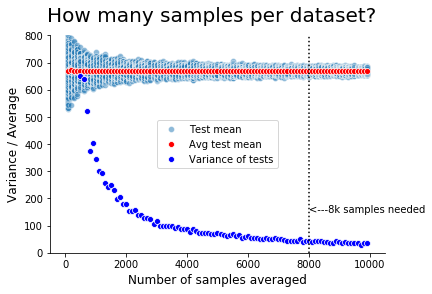

In [192]:
scores = pd.read_csv('../data/perfect.csv')
xplots = []
yplots = []
for bootstrap_size in range(100, 10000, 100):
    for plots in range(500):
        xplots.append(bootstrap_size)
        yplots.append(
            np.random.choice(
            a=scores['score'],
            size=bootstrap_size,
            replace=True).mean()
        )   
        
df = pd.DataFrame(zip(xplots, yplots), columns=['boot_size','mean'])
mean = df.groupby('boot_size').mean()
std = df.groupby('boot_size').var()

fig, ax = plt.subplots()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax = sea.scatterplot(xplots,yplots,alpha=.5,label='Test mean')
ax = sea.scatterplot(mean['mean'].index,mean['mean'],color ='r',label='Avg test mean')
ax = sea.scatterplot(std['mean'].index,std['mean'],color ='b',label='Variance of tests')
plt.ylim(bottom=0, top=800);
plt.legend()
ax.set_ylabel('Variance / Average', fontsize=12)
ax.set_xlabel('Number of samples averaged', fontsize=12)
fig.suptitle('How many samples per dataset?', fontsize=20)
ax.axvline(8000, color='k', linestyle=':')
ax.text(8000,150, '<---8k samples needed')
plt.savefig('../images/sample_size_test.png', format='png')
;

In [7]:
def get_dist(df):
    mean = []
    std = []
    for _ in range(8000):
        boot = np.random.choice(a=df['score'],size=8000,replace=True)
        mean.append(boot.mean())
        std.append(boot.std())
    return norm(np.mean(mean), (np.mean(std)/np.sqrt(8000)) )


''

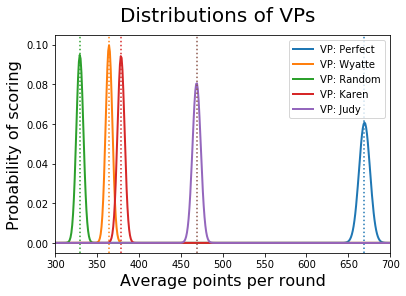

In [196]:
fig, ax = plt.subplots()
x = np.linspace(0, 2000, num=2000)

df = pd.read_csv('../data/perfect.csv')
ax.plot(x,get_dist(df).pdf(x),linewidth=2,label='VP: Perfect')
ax.axvline(df['score'].mean(),color='C0',linestyle=':')

df1 = pd.read_csv('../data/wyatte.csv')
df1.score.where(df1.outcome,0,inplace=True)
ax.plot(x,get_dist(df1).pdf(x),linewidth=2,label='VP: Wyatte')
ax.axvline(df1['score'].mean(),color='C1',linestyle=':')

df2 = pd.read_csv('../data/random.csv')
df2.score.where(df2.outcome,0,inplace=True)
ax.plot(x, get_dist(df2).pdf(x), linewidth=2, label='VP: Random')
ax.axvline(df2['score'].mean(),color='C2',linestyle=':')

df3 = pd.read_csv('../data/karen.csv')
df3.score.where(df3.outcome,0,inplace=True)
ax.plot(x, get_dist(df3).pdf(x), linewidth=2, label='VP: Karen')
ax.axvline(df3['score'].mean(),color='C3',linestyle=':')

df5 = pd.read_csv('../data/judy.csv')
df5.score.where(df5.outcome,0,inplace=True)
ax.plot(x,get_dist(df5).pdf(x),linewidth=2,label='VP: Judy')
ax.axvline(df5['score'].mean(),color='C5',linestyle=':')

ax.set_xlim(300,700)
ax.legend()
ax.set_ylabel('Probability of scoring', fontsize=16)
ax.set_xlabel('Average points per round', fontsize=16)
fig.suptitle('Distributions of VPs', fontsize=20)
plt.savefig('../images/vp_compare.png', format='png')
;

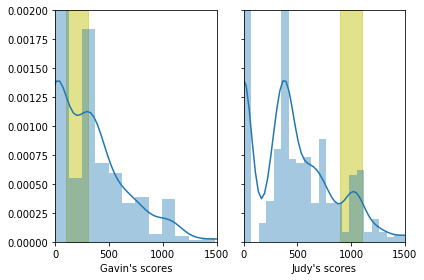

In [181]:
import matplotlib.patches as patches
plt.close()
null = pd.read_csv('../data/human.csv')
null.where(df1.outcome,0,inplace=True)
alt = pd.read_csv('../data/judy.csv')
alt.score.where(alt.outcome,0,inplace=True)
fig, axes = plt.subplots(1,2)
sea.distplot(null['score'], ax=axes[0])
sea.distplot(alt['score'], ax=axes[1])

axes[0].fill_between([100, 300], [.002,.002], color='y', alpha=.45)
axes[1].fill_between([900, 1100], [.002,.002], color='y', alpha=.45)
axes[0].set_ylim(0,.002)
axes[0].set_xlim(0,1500)
axes[0].set_xlabel('Gavin\'s scores')
axes[1].set_ylim(0,.002)
axes[1].set_xlim(0,1500)
axes[1].set_xlabel('Judy\'s scores')
axes[1].set_yticklabels([])



fig.tight_layout()
plt.savefig('../images/vp_compare.png', format='png')

These two graphs show the differences between our human player's scores and the Judy VP. Mainly, our player is making more scores in the 100 to 300 point range as indicated by the yellow bar. Judy, on the other hand, is giving up these scores. As a result, Judy is able to gain substantially more rolls with scores between 900 and  1100.

We will now give our human player a second try after informing them of these new revelations.

(0, 1500)

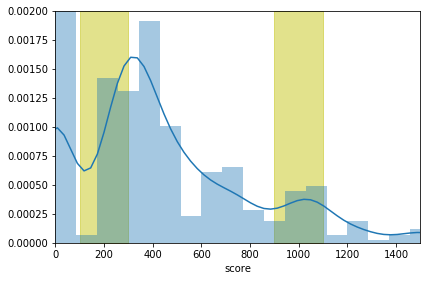

In [183]:
h2 = pd.read_csv('../data/human2.csv')
h2.where(h2.outcome,0,inplace=True)
fig, ax = plt.subplots()
sea.distplot(h2['score'], ax=ax)
ax.set_ylim(0,.0015)
ax.set_xlim(0,1500)
fig.tight_layout()
ax.fill_between([100, 300], [.002,.002], color='y', alpha=.45)
ax.fill_between([900, 1100], [.002,.002], color='y', alpha=.45)
ax.set_ylim(0,.002)
ax.set_xlim(0,1500)

In [184]:
null_vs_sample_p_score = ks_2samp(h2['score'], null['score'])
alt_vs_sample_p_score = ks_2samp(h2['score'], alt['score'])
print(null_vs_sample_p_score)
print(alt_vs_sample_p_score)

Ks_2sampResult(statistic=0.198, pvalue=4.474354210236279e-09)
Ks_2sampResult(statistic=0.07874999999999999, pvalue=0.005455587176584018)
